# 411 assignments

# MD. AMANULLAH SHAH
# ID: 2121737642

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [16]:
# Assuming your data is stored in CSV files
teacher_df = pd.read_csv('teacher_data.csv')
department_df = pd.read_csv('department_data.csv')
student_df = pd.read_csv('student_data.csv')
fact_table_df = pd.read_csv('fact_table_data.csv')


In [17]:
teacher_df

,teacher_id,name,highest_degree,country_degree,age,gender
0,1,Kyle Scott,M.Phil,Tuvalu,46,Male
1,2,Christopher Peterson,B.Sc.,Turks and Caicos Islands,31,Female
2,3,Michael Drake,B.Sc.,Eritrea,54,Female
3,4,Joseph Jimenez,M.A.,Algeria,48,Male
4,5,Kara Ramirez,M.Phil,Lebanon,49,Female
...,...,...,...,...,...,...
495,496,Michelle Burns,Ph.D.,Germany,30,Male
496,497,Carol Martinez,M.Phil,United States of America,50,Female
497,498,Mrs. Megan Travis,M.Phil,Rwanda,31,Female
498,499,Stephanie Bell,M.Phil,Saint Vincent and the Grenadines,32,Female


# Merge fact table with necessary dimensions

In [18]:

merged_df = pd.merge(fact_table_df, teacher_df, on='teacher_id', how='inner')
merged_df = pd.merge(merged_df, department_df, on='department_id', how='inner')
merged_df = pd.merge(merged_df, student_df, on='student_id', how='inner')


## Average Grade Point by Teacher:

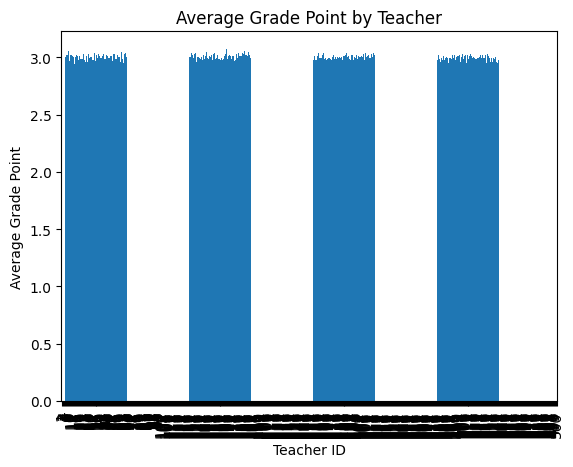

In [19]:
teacher_avg_grade = merged_df.groupby('teacher_id')['grade_point'].mean()
teacher_avg_grade.plot(kind='bar', xlabel='Teacher ID', ylabel='Average Grade Point', title='Average Grade Point by Teacher')
plt.show()


## Average Grade Point by Department:

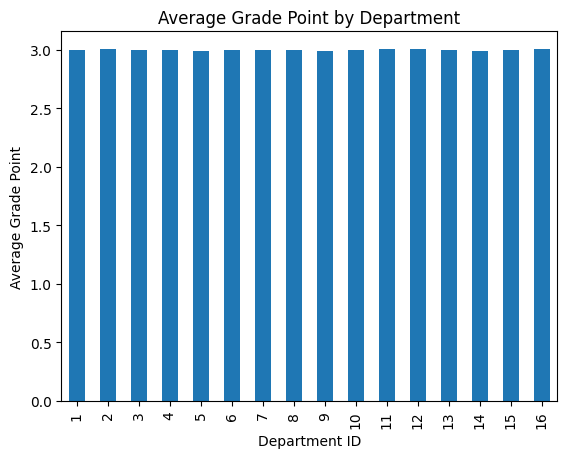

In [20]:
department_avg_grade = merged_df.groupby('department_id')['grade_point'].mean()
department_avg_grade.plot(kind='bar', xlabel='Department ID', ylabel='Average Grade Point', title='Average Grade Point by Department')
plt.show()


## Top Performing Students:

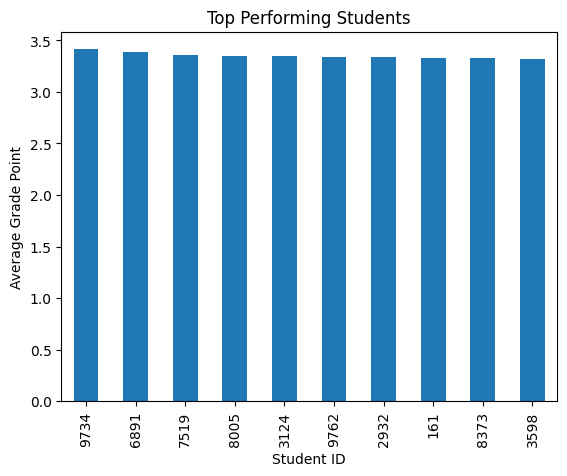

In [21]:
top_students = merged_df.groupby('student_id')['grade_point'].mean().sort_values(ascending=False).head(10)
top_students.plot(kind='bar', xlabel='Student ID', ylabel='Average Grade Point', title='Top Performing Students')
plt.show()


## Analyze the distribution of grade points given by each teacher

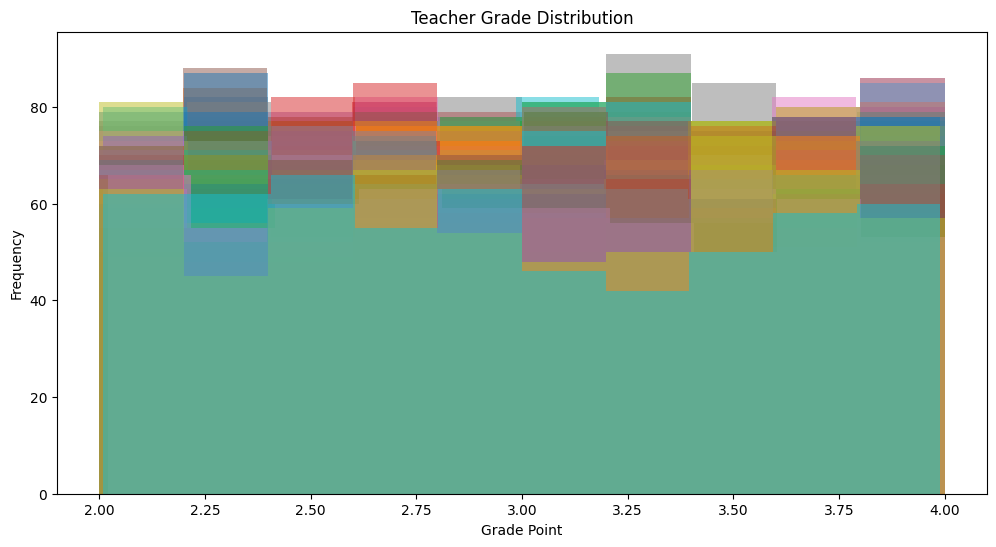

In [22]:
plt.figure(figsize=(12, 6))
for teacher_id, group in merged_df.groupby('teacher_id'):
    plt.hist(group['grade_point'], bins=10, alpha=0.5, label=f'Teacher {teacher_id}')

plt.xlabel('Grade Point')
plt.ylabel('Frequency')
plt.title('Teacher Grade Distribution')
#plt.legend()
plt.show()


## Average grade points based on teacher gender

In [23]:
teacher_gender_avg = merged_df.groupby('gender')['grade_point'].mean()
teacher_gender_avg.plot(kind='bar', xlabel='Teacher Gender', ylabel='Average Grade Point', title='Average Grade Point by Teacher Gender')
plt.show()


KeyError: 'gender'

## Department Average Grade Point Over Time

In [ ]:
plt.figure(figsize=(12, 6))
for department_id, group in merged_df.groupby('department_id'):
    plt.plot(group.groupby('year')['grade_point'].mean(), label=f'Department {department_id}')

plt.xlabel('Year')
plt.ylabel('Average Grade Point')
plt.title('Department Average Grade Point Over Time')
plt.legend()
plt.show()


## Student Age vs. Grade Point

In [ ]:
plt.scatter(merged_df['age'], merged_df['grade_point'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Grade Point')
plt.title('Student Age vs. Grade Point')
plt.show()


In [ ]:
-